# Visualization

As the return value of a sliced dataset is a `xarray.DataArray` instead of a `numpy.ndarray` plotting features of `xarray` is used. For more information about `xarray` see https://docs.xarray.dev/en/stable/

In [1]:
import h5rdmtoolbox as h5tbx
import matplotlib.pyplot as plt
import numpy as np

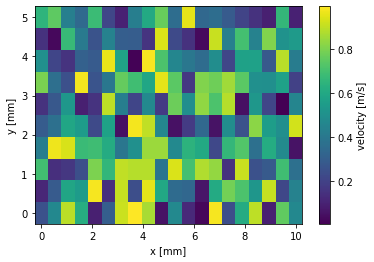

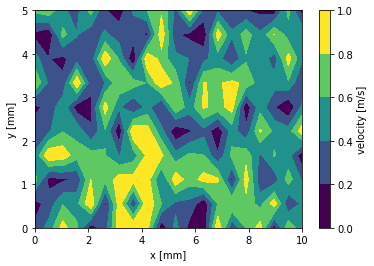

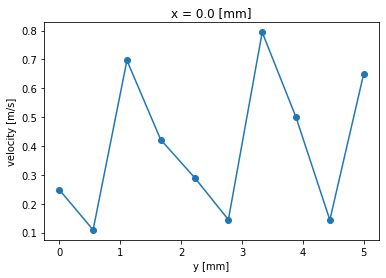

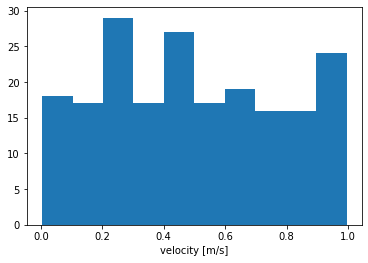

In [2]:
with h5tbx.H5File() as h5:
    dsx = h5.create_dataset('x', data=np.linspace(0, 10, 20), units='mm', long_name='x', make_scale=True)
    dsy = h5.create_dataset('y', data=np.linspace(0, 5, 10), units='mm', long_name='y', make_scale=True)
    h5.create_dataset('data', data=np.random.random((10, 20)), units='m/s', long_name='velocity', attach_scales=(dsy, dsx))
    
    # some plotting
    plt.figure()
    h5['data'][:].plot()
    plt.figure()
    h5['data'][:].plot.contourf()
    plt.figure()
    h5['data'][:,0].plot.line(marker='o')
    plt.figure()
    h5['data'][:].plot.hist()